# Simple Linear Regression

We'll explore how to create a very simple fit line, the classic case of `y=mx+b`.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

> *Data and analysis example taken from "An Introduction to Statistical Learning" (Trevor Hastie, Robert Tibshirani)*

It displays **sales** (in thousands of units) for a product as a function of **advertising budgets** (in thousands of dollars) for **TV, radio, and newspaper** media.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Business questions??

**Is there a relationship between *total* advertising spend and *sales*?**

**If so, could we get an estimation of sales based on the marketing advertising investment?**

In [8]:
# Calculate the "total spend" in a new column

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


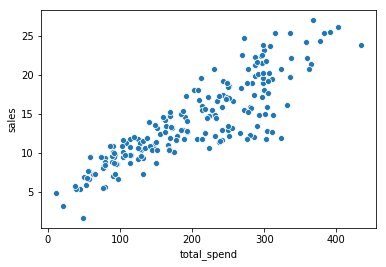

In [9]:
# Plot the relationship between total spend vs sales
sns.scatterplot(x='total_spend',y='sales',data=df);

## Calculating the Least Squares line

**We all know that a simple approach for the required estimation would be a least squares line.**

Having a line that fits into this relationship will allow us to estimate the sales considering some amount of investment on advertising. 

> If we spend $350, what would the expected sales be? 

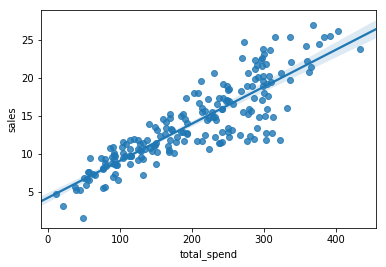

In [18]:
# Basically, we want to figure out how to create this line
# sns.regplot: Plot data and a linear regression model fit.

sns.regplot(x='total_spend',y='sales',data=df);

### Solving the problem 

We need to solve: $$y=mx+b$$

In a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Y represents a *known* matrix of labels (`sales` numbers)  and X a *known* matrix of `total_spend`. 

We need to solve for the *beta* coefficients considering just 1 feature (in the next example we will expand to more features).

> Note that we use "y hat" to indicate that is a prediction or estimation, y would be a true label/known value.

We can use the power of NumPy for this using the function polyfit.

Take a look at ```help(np.polyfit)```

In [19]:
X = df['total_spend']
y = df['sales']

In [20]:
print(X.shape)
print(y.shape)

(200,)
(200,)


In [21]:
X[:5]

0    337.1
1    128.9
2    132.4
3    251.3
4    250.0
Name: total_spend, dtype: float64

In [22]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [24]:
# Returns highest order coef first!
# np.polyfit: Calculate least squares polynomial fit 
# Return polynomial coefficients, highest power first.

m,b=np.polyfit(X,y,1)

In [25]:
print("m: ",m)
print("b: ",b)

m:  0.048687879319048145
b:  4.2430282160363255


#### How do we know that this a 'good' fit?

---
## Compare our model on the real data

In [39]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)
potential_spend.shape

(100,)

In [40]:
predicted_sales =  m*potential_spend + b
predicted_sales.shape

(100,)

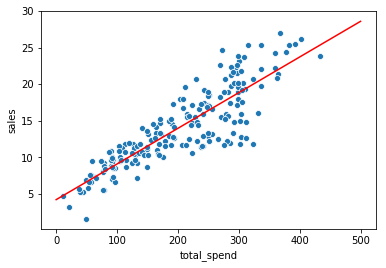

In [42]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red');

### Let's try an estimation

**Our next ad campaign will have a total spend of $350, how many units do we expect to sell as a result of this?**

In [43]:
spend = 350
pred =  m*spend + b

In [44]:
pred

21.283785977703175

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line. 

- What if we explore higher orders?
- Does higher order mean an overall better fit? 
- Is it possible to fit **too** much? Too little? 
- How would we know and how do we even define a good fit?


In [48]:
# Let's try with order 3
b0,b1,b2,b3=np.polyfit(X,y,3)

In [50]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)
potential_spend.shape

(100,)

In [51]:
predicted_sales =   b0*potential_spend**3 + b1*potential_spend**2 + b2*potential_spend**1 + b3
predicted_sales.shape

(100,)

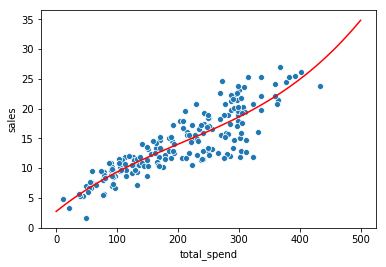

In [53]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red');

**Is this better than our straight line fit?**

What are good ways of measuring this?

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

In [ ]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [ ]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,1)

**Uh oh! Polyfit only works with a 1D X array! We'll need to move on to a more powerful library...**

-------
--------